http://simbad.u-strasbg.fr/simbad/sim-id?Ident=IRAS+16562-3959

Guzman, Sanhueza: https://ui.adsabs.harvard.edu/search/q=bibcode%3A(2020ApJ...904...77G)&sort=date%20desc%2C%20bibcode%20desc&p_=0

https://ui.adsabs.harvard.edu/#abs/2020ApJ...904...77G/abstract

G345.4938+01.4677 

Just one source named "IRAS16562" in the table

In [1]:
from astropy import units as u
distance = 2.3*u.kpc
vcen = -14 * u.km/u.s # from Patricio


In [2]:
cd /orange/adamginsburg/salt/sanhueza/I16562

/orange/adamginsburg/salt/sanhueza/I16562


In [3]:
ls

bigbox.reg
box.reg
ipython_log_2021-10-06.py
IRAS_165623959.config8.cont_avg.selfcal_0.5_hogbom.image.fits*
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller.fits
IRAS_165623959.config8.spw0.robust0.5.image_small.fits*
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller.fits
IRAS_165623959.config8.spw1.robust0.5.image_small.fits*
IRAS_165623959.config8.spw2.robust0.5.image_cb_smaller.fits
IRAS_165623959.config8.spw2.robust0.5.image_small.fits*
IRAS_165623959.config8.spw3.robust0.5.image_cb_smaller.fits
IRAS_165623959.config8.spw3.robust0.5.image_small.fits*
NaCl_v_le_3_stackcube.fits
rrldiskbox.reg
spectra/


In [4]:
%matplotlib inline
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'

from spectral_cube import SpectralCube
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2b9301b46b50>

In [5]:
from astropy.table import Table
from astropy import table

In [6]:
import pprint

In [7]:
import scipy, scipy.ndimage

In [8]:
import numpy as np
import os
import glob
from astropy import constants, units as u, table, stats, coordinates, wcs, log, coordinates as coord
import radio_beam
import pyspeckit
import pylab as pl
from astroquery.splatalogue.utils import minimize_table as mt
import sys
sys.path.append('/orange/adamginsburg/salt/Orion_ALMA_2016.1.00165.S/analysis')
import lines
import paths
from salt_tables import (salt_tables, salt_table_names, SO, SO2, HCl, sis_tables, AlCl, AlF, Al37Cl,
                         NaF, AlO, AlOH, NaCN, CaS, CaO)

urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.7) doesn't match a supported version!


In [9]:
ls *.reg

bigbox.reg  box.reg  rrldiskbox.reg


In [10]:
import regions
from astropy import units as u, coordinates
reg = regions.Regions.read('bigbox.reg')
regsm = regions.Regions.read('box.reg')
regvsm = regions.Regions.read('rrldiskbox.reg') # IRAS16562
#regvvsm = regions.Regions.read('innerdiskbox.reg')

In [11]:
from astropy import visualization

Setting the 'color' property will override the edgecolor or facecolor properties.
Setting the 'color' property will override the edgecolor or facecolor properties.
Setting the 'color' property will override the edgecolor or facecolor properties.


(2775.0, 2966.0, 2805.0, 2996.0)

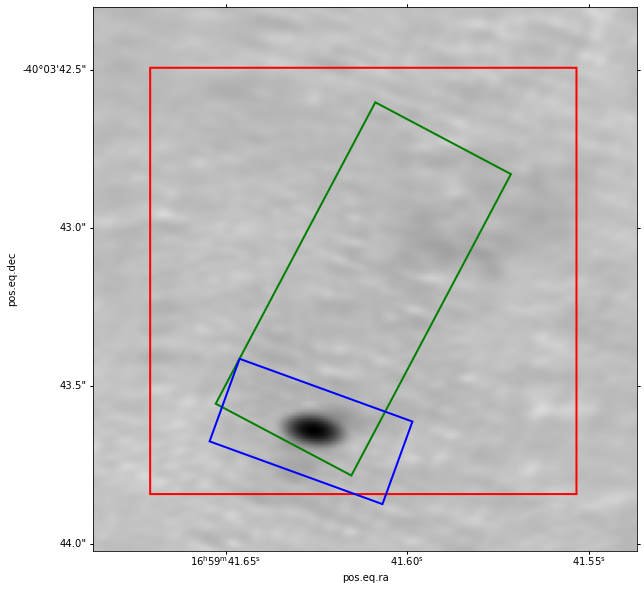

In [12]:
cont = SpectralCube.read('IRAS_165623959.config8.cont_avg.selfcal_0.5_hogbom.image.fits')
pl.figure(figsize=(10,10))
ax = pl.subplot(projection=cont[0].wcs)
ax.imshow(cont[0].value, cmap='gray_r', norm=visualization.simple_norm(cont[0].value, stretch='log'))
reg[0].to_pixel(cont[0].wcs).plot(ax=ax, color='r')
regsm[0].to_pixel(cont[0].wcs).plot(ax=ax, color='g')
regvsm[0].to_pixel(cont[0].wcs).plot(ax=ax, color='b')
#regvvsm[0].to_pixel(cont[0].wcs).plot(ax=ax)
pp = reg[0].to_pixel(cont.wcs.celestial)
bb = pp.bounding_box
ax.axis([bb.ixmin-20, bb.ixmax+20, bb.iymin-20, bb.iymax+20])

# NaCl Stackl

In [13]:
from spectral_cube.analysis_utilities import stack_cube

In [14]:
nacltables = salt_tables[3:5]
#nacltables[0]

In [15]:
import spectral_cube.analysis_utilities
import imp
imp.reload(spectral_cube.analysis_utilities)
from spectral_cube.analysis_utilities import stack_cube

In [16]:
flist = (glob.glob('IRAS_165623959.config8.spw[0-3].robust0.5.image_small.fits'))

In [17]:
for fn in flist:
    outfile = fn.replace("_small","_cb_smaller")
    if not os.path.exists(outfile) or SpectralCube.read(outfile).unit != u.K:
        cube = SpectralCube.read(fn).subcube_from_regions(reg)
        cube.allow_huge_operations=True
        cb = cube.beams.common_beam(max_iter=20, max_epsilon=0.01)
        scube = cube.convolve_to(cb)
        scube.to(u.K).write(outfile, overwrite=True)

In [18]:
cubes = [SpectralCube.read(fn, use_dask=True).subcube_from_regions(reg) for fn in (glob.glob('IRAS_165623959.config8.spw[0-3].robust0.5.image_cb_smaller.fits'))]
cubes

[DaskSpectralCube with shape=(3840, 150, 150) and unit=K and chunk size (640, 150, 150):
  n_x:    150  type_x: RA---SIN  unit_x: deg    range:   254.923142 deg:  254.923628 deg
  n_y:    150  type_y: DEC--SIN  unit_y: deg    range:   -40.062178 deg:  -40.061806 deg
  n_s:   3840  type_s: FREQ      unit_s: Hz     range: 233564760791.000 Hz:235439366812.920 Hz,
 DaskSpectralCube with shape=(3840, 150, 150) and unit=K and chunk size (640, 150, 150):
  n_x:    150  type_x: RA---SIN  unit_x: deg    range:   254.923142 deg:  254.923628 deg
  n_y:    150  type_y: DEC--SIN  unit_y: deg    range:   -40.062178 deg:  -40.061806 deg
  n_s:   3840  type_s: FREQ      unit_s: Hz     range: 219064633178.480 Hz:220939239200.400 Hz,
 DaskSpectralCube with shape=(3840, 150, 150) and unit=K and chunk size (640, 150, 150):
  n_x:    150  type_x: RA---SIN  unit_x: deg    range:   254.923142 deg:  254.923628 deg
  n_y:    150  type_y: DEC--SIN  unit_y: deg    range:   -40.062178 deg:  -40.061806 deg
  n_s: 

In [19]:
# only needed for VRSCs
if hasattr(cubes[0], 'beams'):
    beams = radio_beam.Beams(beams=[cube.beams.common_beam(max_iter=20, max_epsilon=0.01) for cube in cubes])
    cb=beams.common_beam()
else:
    beams = radio_beam.Beams(beams=[cube.beam for cube in cubes])
    cb=beams.common_beam()

In [20]:
cb

Beam: BMAJ=0.10612074327676284 arcsec BMIN=0.05378061945456527 arcsec BPA=81.71778022124695 deg

In [21]:
(cb.major*distance).to(u.au, u.dimensionless_angles())

<Quantity 244.07770954 AU>

In [22]:
(cb.minor*distance).to(u.au, u.dimensionless_angles())

<Quantity 123.69542475 AU>

In [23]:
linelist = np.concatenate([data['Freq'][(data['vu'] <= 3) &
                                          np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                                                   (data['Freq'].quantity < cube.spectral_extrema[1]))
                                                 for cube in cubes],
                                                 axis=0)].quantity
                             for data in nacltables])
linenames = np.concatenate( [data['Species'][(data['vu'] <= 3) &
                                          np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                                                   (data['Freq'].quantity < cube.spectral_extrema[1]))
                                                 for cube in cubes],
                                                 axis=0)]
                             for data in nacltables] )
(linelist, linenames)

(<Quantity [217.980231, 219.614936, 232.509977, 234.251912] GHz>,
 array(['23Na-35Clv=2-2 J=17-16', '23Na-35Clv=1-1 J=17-16',
        '23Na-35Clv=1-1 J=18-17', '23Na-35Clv=0-0 J=18-17'], dtype='<U24'))

In [24]:
from astropy import log
log.setLevel('INFO')

In [25]:
# log.setLevel('DEBUG')
vcen = -14 * u.km/u.s # from Patricio
stack, cutouts = stack_cube(cubes,
                   linelist=linelist,
                   vmin=vcen-30*u.km/u.s,
                   vmax=vcen+30*u.km/u.s,
                   average=np.nanmean,
                   convolve_beam=cb,
                   return_cutouts=True)
#log.setLevel('INFO')
stack.write('NaCl_v_le_3_stackcube.fits', overwrite=True)

In [26]:
stackc = SpectralCube.read('NaCl_v_le_3_stackcube.fits')
stackc

SpectralCube with shape=(90, 150, 150) and unit=K:
 n_x:    150  type_x: RA---SIN  unit_x: deg    range:   254.923142 deg:  254.923628 deg
 n_y:    150  type_y: DEC--SIN  unit_y: deg    range:   -40.062178 deg:  -40.061806 deg
 n_s:     90  type_s: VRAD      unit_s: km / s  range:      -43.875 km / s:      15.896 km / s

In [27]:
jtok = stackc.beam.jtok(217*u.GHz)

All-NaN slice encountered
invalid value encountered in true_divide


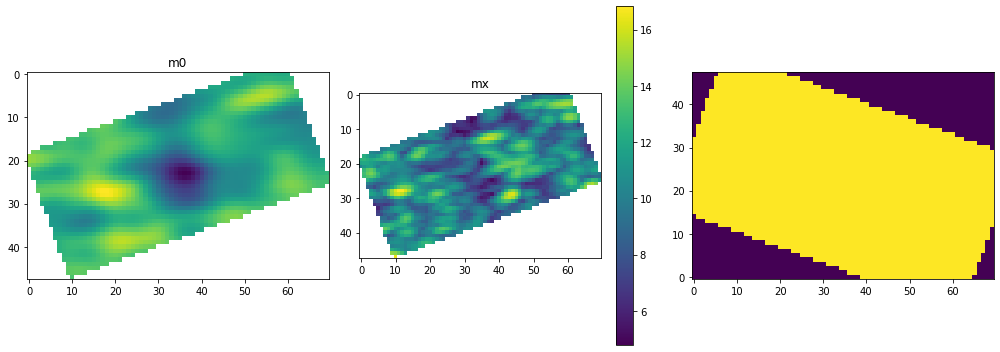

<Figure size 432x288 with 0 Axes>

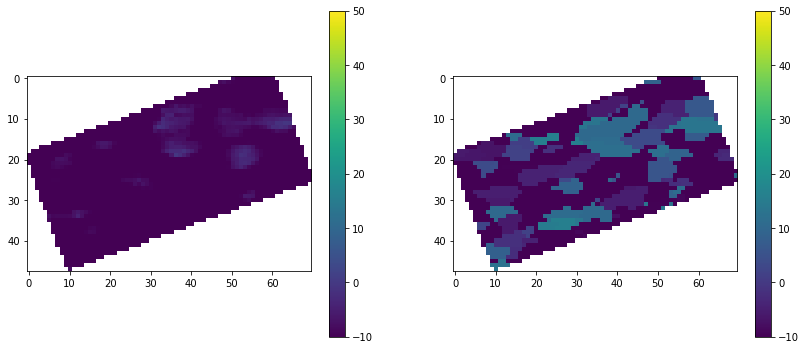

In [28]:
stackc = stackc.subcube_from_regions(regvsm)
pl.figure(figsize=(14,5))
pl.subplot(1,3,1)
m0 = stackc.moment0()
m0.quicklook()
pl.title("m0")

pl.subplot(1,3,2)
mx = stackc.max(axis=0)
mx.quicklook()
pl.title("mx")
pl.colorbar()
pl.subplot(1,3,3)
msk = mx > 0.00016*mx.unit*jtok.value
msk = scipy.ndimage.binary_erosion(msk, iterations=1)
msk = scipy.ndimage.binary_dilation(msk, iterations=5)
pl.imshow(msk, interpolation='none', origin='lower')
pl.tight_layout()
pl.figure()


m1 = stackc.with_mask(msk).with_mask(stackc > 0.0005*stackc.unit*jtok.value).moment1()
pl.figure(figsize=(14,6))
ax1 = pl.subplot(1,2,1)
im = ax1.imshow(m1.value, vmin=-10, vmax=50)
pl.colorbar(mappable=im)
mxv = stackc.with_mask(msk).argmax_world(axis=0)
pl.subplot(1,2,2)
pl.imshow(mxv.value, vmin=-10, vmax=50)
pl.colorbar()


vmapnacl = mxv.hdu

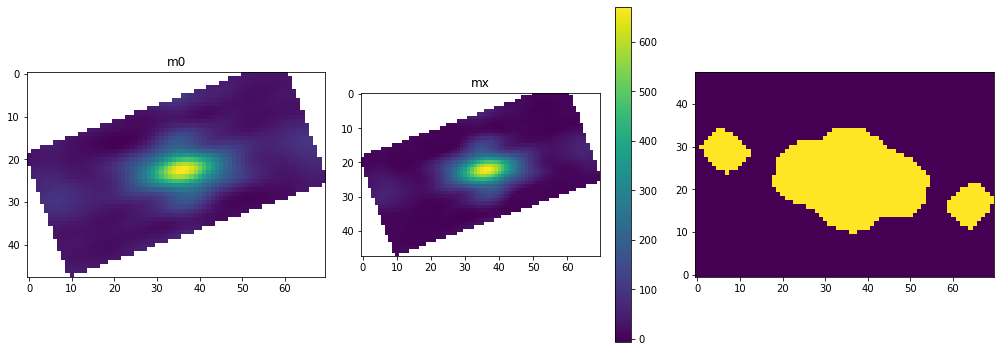

<Figure size 432x288 with 0 Axes>

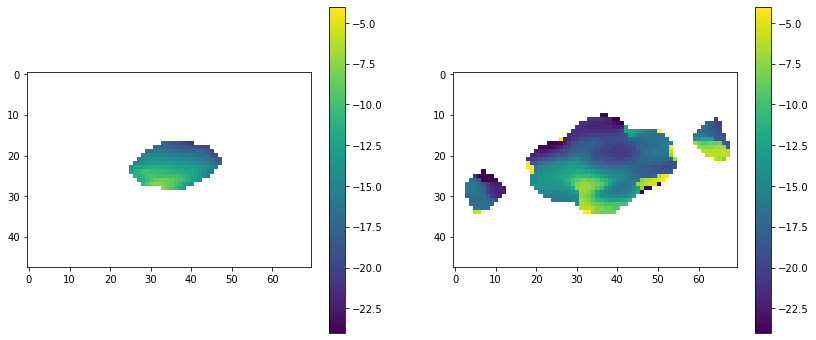

In [29]:
# try creating a vmap based on another line
restval = 218.32471100 *u.GHz # HC3N
restval = 231.90092800 * u.GHz # H30a
cube = [c for c in cubes if (c.spectral_extrema[0] < restval) & (c.spectral_extrema[1] > restval)][0]
from astropy.convolution import Gaussian1DKernel
scube = cube.subcube_from_regions(regvsm).with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=restval).spectral_slab(-50*u.km/u.s + vcen, 50*u.km/u.s + vcen).spectral_smooth(Gaussian1DKernel(5))
pl.figure(figsize=(14,5))
pl.subplot(1,3,1)
m0 = scube.moment0()
m0.quicklook()
pl.title("m0")

pl.subplot(1,3,2)
mx = scube.max(axis=0)
mx.quicklook()
pl.title("mx")
pl.colorbar()
pl.subplot(1,3,3)
msk = mx > 0.01*mx.unit*jtok.value
msk = scipy.ndimage.binary_erosion(msk, iterations=1)
msk = scipy.ndimage.binary_dilation(msk, iterations=3)
pl.imshow(msk, interpolation='none', origin='lower')
pl.tight_layout()
pl.figure()


from dask_image.ndmorph import binary_dilation, binary_erosion
m3d = (scube > 200*u.K).include()
m3d = binary_erosion(m3d, iterations=1)
m3d = binary_dilation(m3d, iterations=2)
m3d = m3d.compute()




m1 = scube.with_mask(msk).with_mask(m3d).moment1()
pl.figure(figsize=(14,6))
ax1 = pl.subplot(1,2,1)
im = ax1.imshow(m1.value, vmin=-10+vcen.value, vmax=10+vcen.value)
pl.colorbar(mappable=im)
mxv = scube.with_mask(msk).argmax_world(axis=0)
pl.subplot(1,2,2)
pl.imshow(mxv.value, vmin=-10+vcen.value, vmax=10+vcen.value)
pl.colorbar()


#vmap = mxv.hdu
vmap = m1.hdu
# the rest value selected above was just the line center; we need to assume it's really 32 km/s off
#vmap.data = vmap.data + vcen.value

In [30]:
import sys
sys.path.append('/orange/adamginsburg/salt/code/')
from overplot_saltlines import overplot_saltlines

In [31]:
spectra = []
for ii,cube in enumerate(cubes):
    cube.allow_huge_operations=True
    sp = cube.subcube_from_regions(regsm).mean(axis=(1,2))
    pysp = pyspeckit.Spectrum(data=sp, xarr=sp.spectral_axis, header=sp.header)
    spectra.append(pysp)
    pysp.specname = f'IRAS16562 spw{ii}'
    # nope see below pysp.write(f"spectra/IRAS16562_spw{ii}_meanspec.fits")

In [32]:
mkdir -p spectra/figures

IRAS16562_spw0
IRAS16562_spw1
IRAS16562_spw2
IRAS16562_spw3


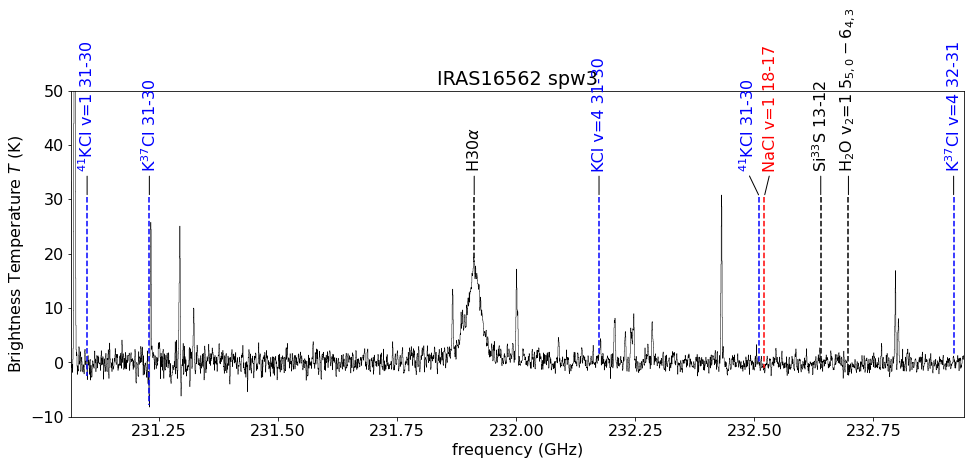

In [33]:
overplot_saltlines(spectra, vcen=vcen, savepath='spectra/figures', ymin=-10, ymax=50)

In [34]:
ls spectra/figures

color_labels_IRAS_165623959_spw0_stack.png
color_labels_IRAS_165623959_spw1_stack.png
color_labels_IRAS_165623959_spw2_stack.png
color_labels_IRAS_165623959_spw3_stack.png
color_labels_IRAS16562_spw0.png
color_labels_IRAS16562_spw1.png
color_labels_IRAS16562_spw2.png
color_labels_IRAS16562_spw3.png
color_labels_spw1.png
color_labels_spw2.png
color_labels_spw3.png
color_labels_spw4.png
gallery.html
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller_stack.pdf
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller_stack.png
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller_stack.pdf
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller_stack.png
IRAS_165623959.config8.spw2.robust0.5.image_cb_smaller_stack.pdf
IRAS_165623959.config8.spw2.robust0.5.image_cb_smaller_stack.png
IRAS_165623959.config8.spw3.robust0.5.image_cb_smaller_stack.pdf
IRAS_165623959.config8.spw3.robust0.5.image_cb_smaller_stack.png
IRAS_165623959_spw0_stack.png
IRAS_165623959_spw1_stack.png
IRAS_165623959_spw2

In [35]:
from IPython.display import Image,display

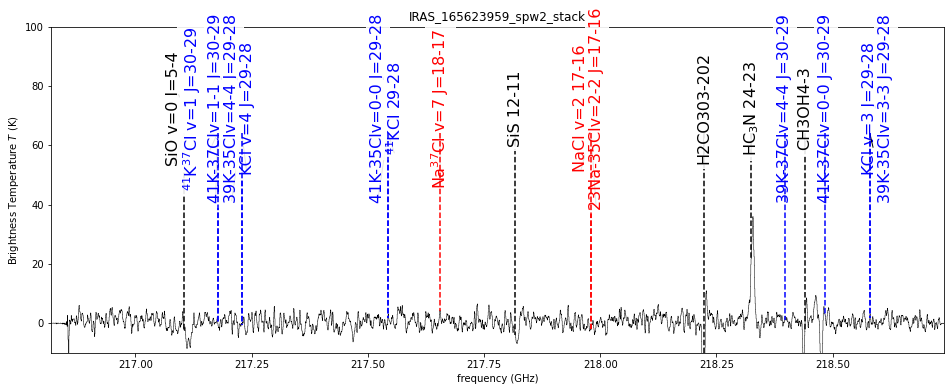

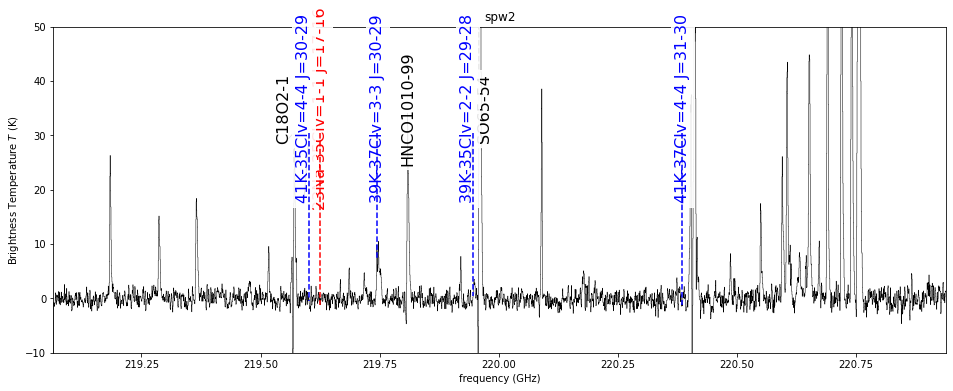

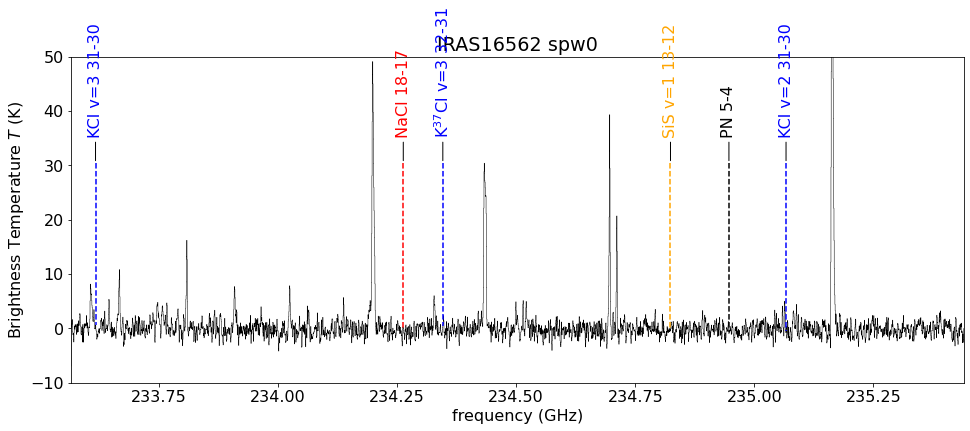

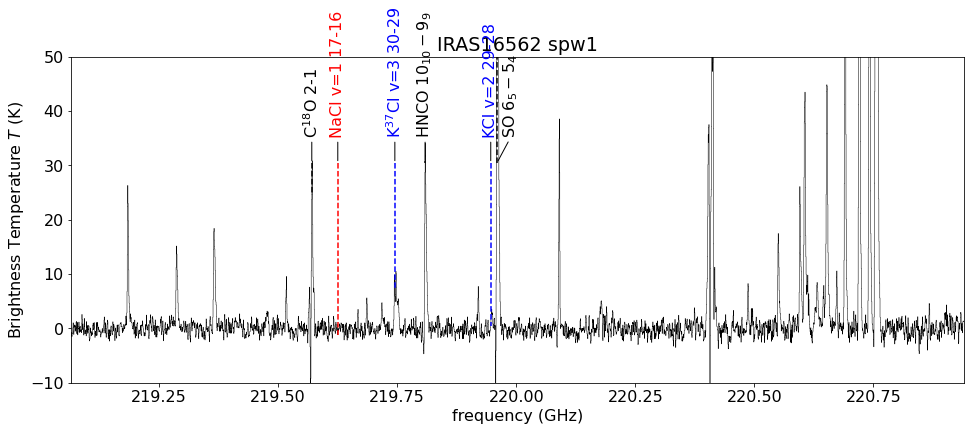

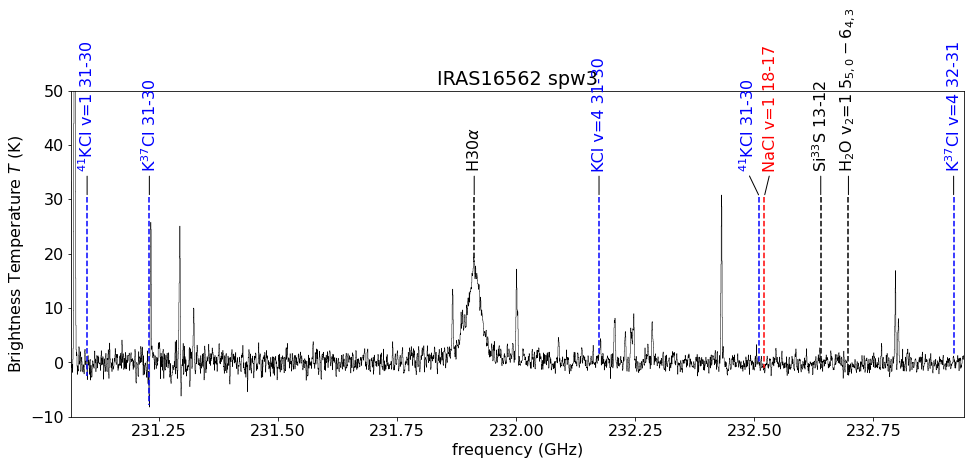

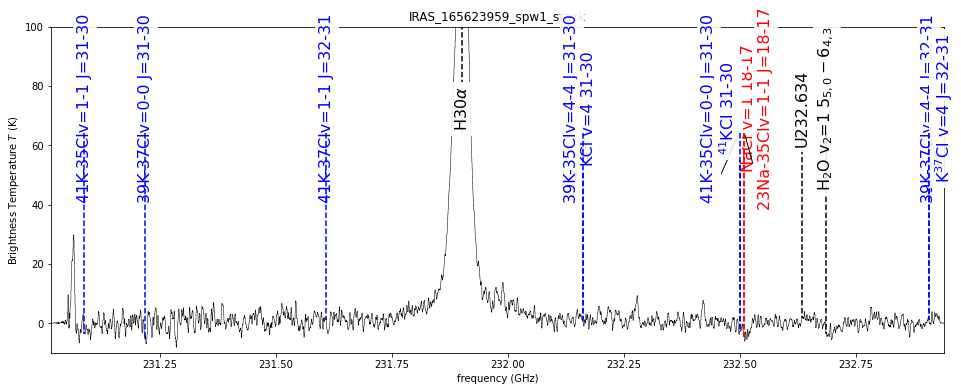

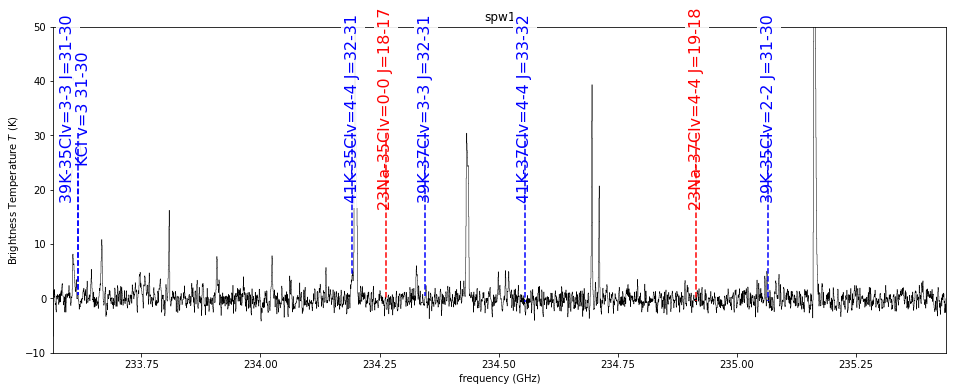

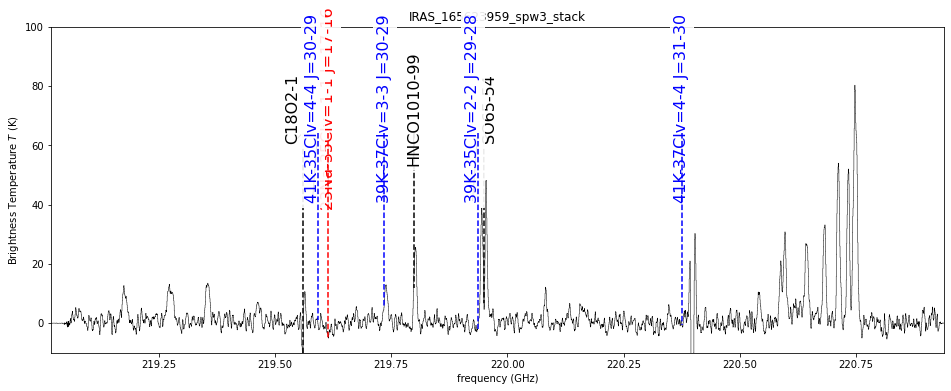

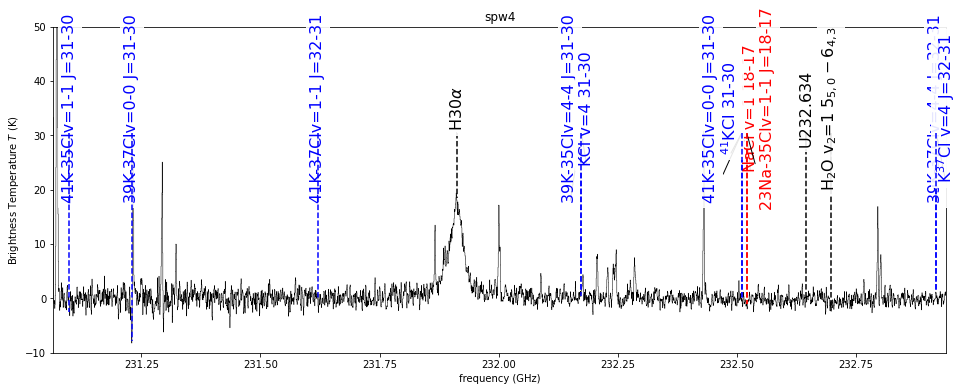

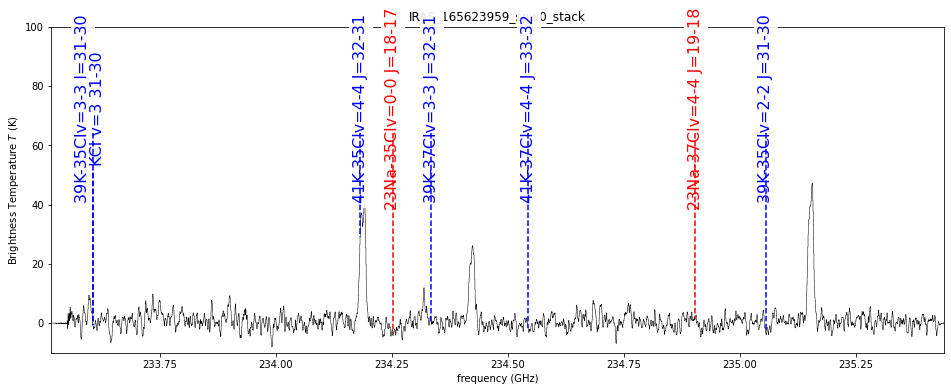

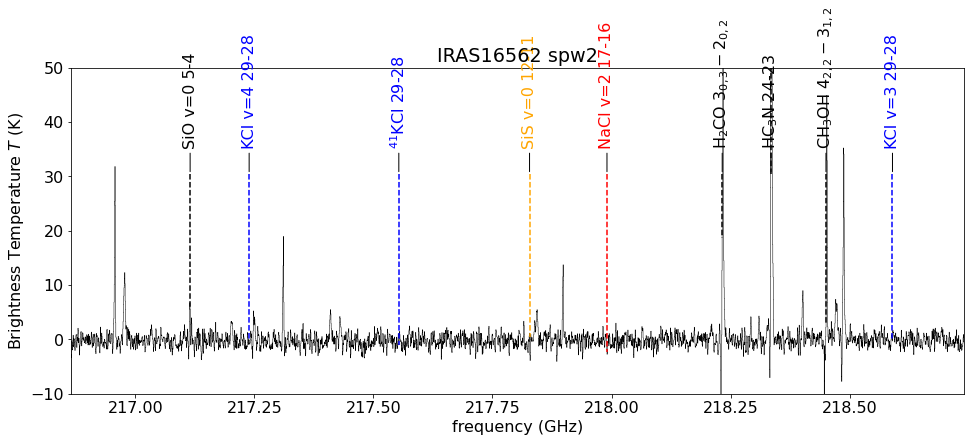

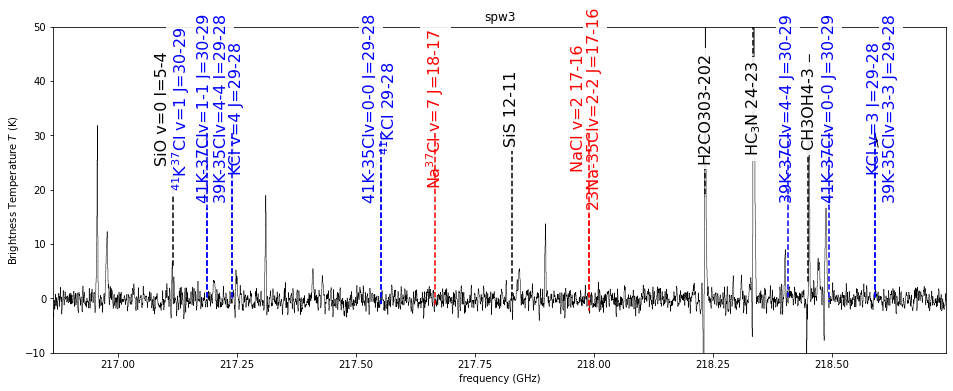

In [36]:
for fn in glob.glob('spectra/figures/color*png'):
    display(Image(fn))

DaskSpectralCube with shape=(3840, 150, 150) and unit=K and chunk size (640, 150, 150):
 n_x:    150  type_x: RA---SIN  unit_x: deg    range:   254.923142 deg:  254.923628 deg
 n_y:    150  type_y: DEC--SIN  unit_y: deg    range:   -40.062178 deg:  -40.061806 deg
 n_s:   3840  type_s: FREQ      unit_s: Hz     range: 233564760791.000 Hz:235439366812.920 Hz
Mean spectrum
Stacking
DaskSpectralCube with shape=(3840, 150, 150) and unit=K and chunk size (640, 150, 150):
 n_x:    150  type_x: RA---SIN  unit_x: deg    range:   254.923142 deg:  254.923628 deg
 n_y:    150  type_y: DEC--SIN  unit_y: deg    range:   -40.062178 deg:  -40.061806 deg
 n_s:   3840  type_s: FREQ      unit_s: Hz     range: 219064633178.480 Hz:220939239200.400 Hz
Mean spectrum
Stacking
DaskSpectralCube with shape=(3840, 150, 150) and unit=K and chunk size (640, 150, 150):
 n_x:    150  type_x: RA---SIN  unit_x: deg    range:   254.923142 deg:  254.923628 deg
 n_y:    150  type_y: DEC--SIN  unit_y: deg    range:   -40.06

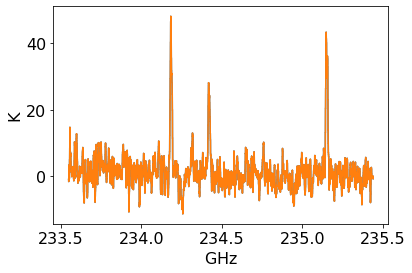

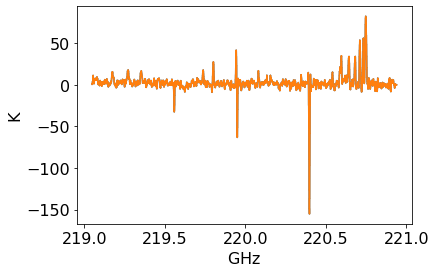

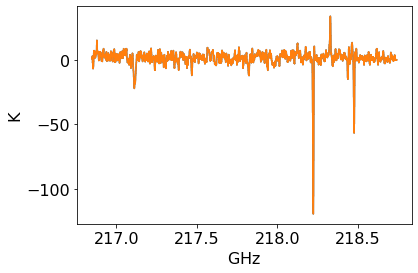

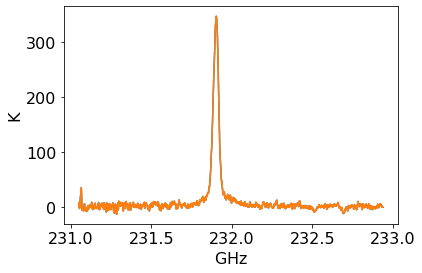

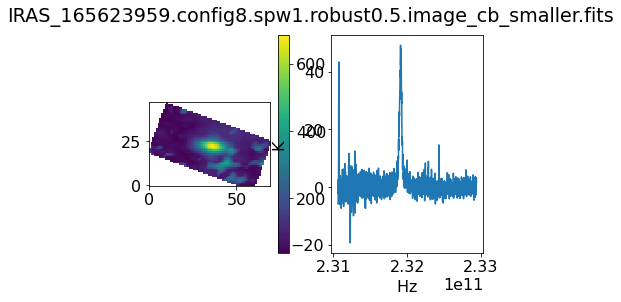

In [38]:
import glob
import spectral_cube.analysis_utilities
import reproject
from tqdm.notebook import tqdm
from astropy.io import fits

cbflist = (glob.glob('IRAS_165623959.config8.spw[0-3].robust0.5.image_cb_smaller.fits'))
for fn in cbflist:
    basename = os.path.split(fn)[-1].split(".fits")[0]
    try:
        cube = SpectralCube.read(fn, use_dask=True)
    except Exception as ex:
        print(ex)
        continue
    print(cube)
    scube = cube.subcube_from_regions(regvsm) # rrldiskbox
    mx = scube.max(axis=0)
    #msk = mx > 0.003*mx.unit
    print("Mean spectrum")
    sp = scube.mean(axis=(1,2))
    
    sp.write(f'spectra/{fn.split("/")[-1].replace(".fits","_rrldiskbox_IRAS16562_meanspec.fits")}', overwrite=True)


    # reproject the velocity map into the cube's coordinate system
    vmap_proj,_ = reproject.reproject_interp(vmap,
                                             scube.wcs.celestial,
                                             shape_out=scube.shape[1:])
    vmap_proj = u.Quantity(vmap_proj, u.km/u.s)
    fits.PrimaryHDU(data=vmap_proj.value, header=scube.wcs.celestial.to_header()).writeto('IRAS16562_vmap.fits', overwrite=True)
    # convert to km/s with arbitrary rest value so 0 km/s can be interpreted
    if scube.spectral_axis.unit.is_equivalent(u.Hz):
        scube = scube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=scube.spectral_axis.mean())

    print("Stacking")
    # perform the stacking!
    stack = spectral_cube.analysis_utilities.stack_spectra(scube, vmap_proj,
                                                           v0=0.0*u.km/u.s,
                                                           #progressbar=tqdm,
                                                           #num_cores=8
                                                          )
    fstack = stack.with_spectral_unit(u.GHz)

    pl.suptitle(f"{fn}")
    fstack.write(f'spectra/{basename}_rrldiskbox_IRAS16562_stack.fits', overwrite=True)

    pl.clf()
    fstack.quicklook(filename=f'spectra/figures/{basename}_rrldiskbox_stack.pdf')
    fstack.quicklook(filename=f'spectra/figures/{basename}_rrldiskbox_stack.png')
    
    
    fig = pl.figure()
    mappable = pl.subplot(1,2,1).imshow(mx.value, origin='lower', interpolation='none')
    pl.colorbar(mappable)
    pl.subplot(1,2,2)
    pl.suptitle(fn)
    sp.quicklook()

In [39]:
ls spectra

figures/
IRAS_165623959.config8.spw0.robust0.5.image_cb_smallerIRAS16562_rrldiskbox_meanspec.fits
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller_meanspec.fits
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller_rrldiskbox_stack.fits
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller_stack.fits
IRAS_165623959.config8.spw1.robust0.5.image_cb_smallerIRAS16562_rrldiskbox_meanspec.fits
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller_meanspec.fits
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller_rrldiskbox_stack.fits
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller_stack.fits
IRAS_165623959.config8.spw2.robust0.5.image_cb_smallerIRAS16562_rrldiskbox_meanspec.fits
IRAS_165623959.config8.spw2.robust0.5.image_cb_smaller_meanspec.fits
IRAS_165623959.config8.spw2.robust0.5.image_cb_smaller_rrldiskbox_stack.fits
IRAS_165623959.config8.spw2.robust0.5.image_cb_smaller_stack.fits
IRAS_165623959.config8.spw3.robust0.5.image_cb_smallerIRAS16562_rrldiskbox_meanspec.fits

In [40]:
stackspectra = []
for ii,fn in enumerate(glob.glob('spectra/*_stack.fits')):
    pysp = pyspeckit.Spectrum(fn)
    basename = os.path.basename(fn)
    spl = basename.split(".")
    pysp.specname = f'{spl[0]}_{spl[2]}_stack'
    stackspectra.append(pysp)

IRAS_165623959_spw2_stack
IRAS_165623959_spw1_stack
IRAS_165623959_spw0_stack
IRAS_165623959_spw1_stack
IRAS_165623959_spw0_stack
IRAS_165623959_spw3_stack
IRAS_165623959_spw2_stack
IRAS_165623959_spw3_stack


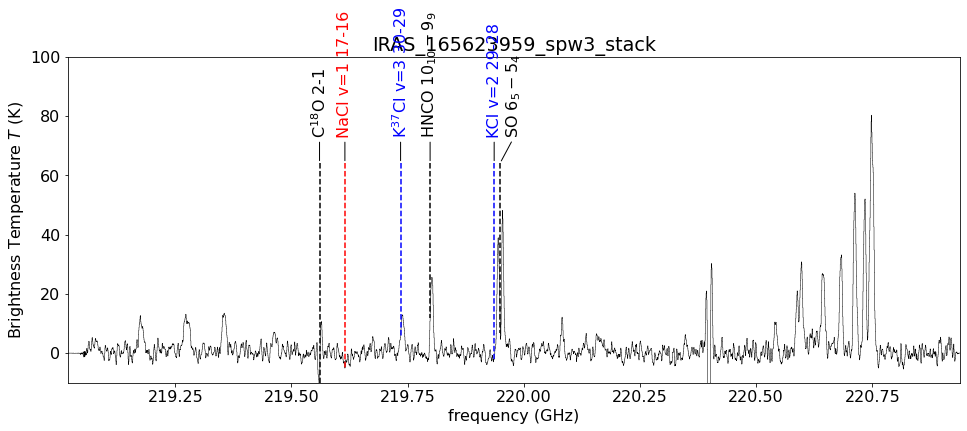

In [41]:
overplot_saltlines(stackspectra, vcen=0*u.km/u.s, savepath='spectra/figures', ymin=-10, ymax=100)

In [42]:
ls spectra/figures/

color_labels_IRAS_165623959_spw0_stack.png
color_labels_IRAS_165623959_spw1_stack.png
color_labels_IRAS_165623959_spw2_stack.png
color_labels_IRAS_165623959_spw3_stack.png
color_labels_IRAS16562_spw0.png
color_labels_IRAS16562_spw1.png
color_labels_IRAS16562_spw2.png
color_labels_IRAS16562_spw3.png
color_labels_spw1.png
color_labels_spw2.png
color_labels_spw3.png
color_labels_spw4.png
gallery.html
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller_rrldiskbox_stack.pdf
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller_rrldiskbox_stack.png
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller_stack.pdf
IRAS_165623959.config8.spw0.robust0.5.image_cb_smaller_stack.png
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller_rrldiskbox_stack.pdf
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller_rrldiskbox_stack.png
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller_stack.pdf
IRAS_165623959.config8.spw1.robust0.5.image_cb_smaller_stack.png
IRAS_165623959.config8.spw2.robust0

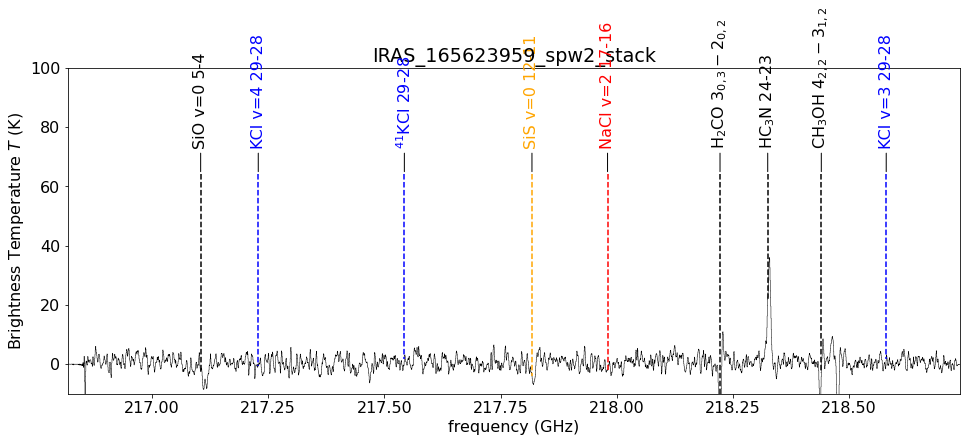

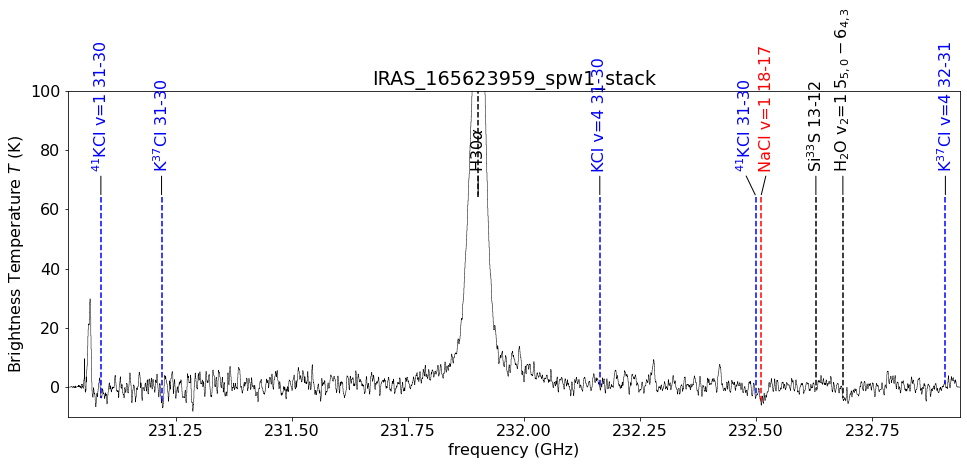

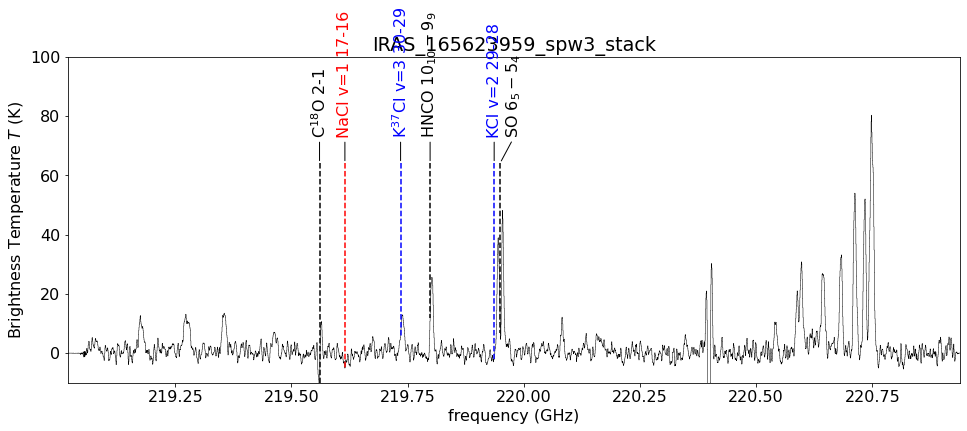

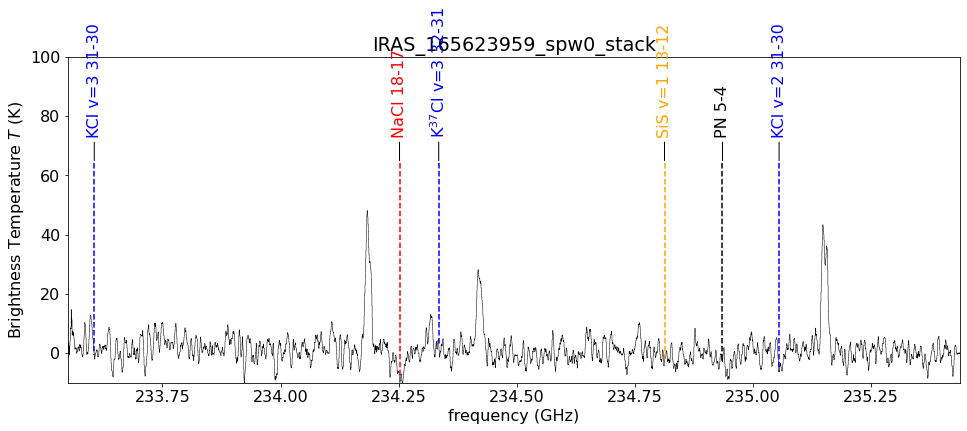

In [43]:
for fn in glob.glob('spectra/figures/color*stack.png'):
    display(Image(fn))